In [4]:
import pandas as pd


In [7]:
d=pd.read_csv('pima-indians-diabetes.csv', header=None)

In [8]:
d.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## How many NA/missing/0 values do we have?

#### Sometimes 0 can be a missing value (based on the context of the data)

### Compute/total how many 0s are there from columns 1-8

In [9]:
print((d[[1,2,3,4,5,6,7]] == 0).sum())

1      5
2     35
3    227
4    374
5     11
6      0
7      0
dtype: int64


In [10]:
(d.iloc[:,1:8] == 0).sum()

1      5
2     35
3    227
4    374
5     11
6      0
7      0
dtype: int64

In [11]:
import numpy as np

In [39]:
# mark zero values as missing or NaN
d[[1,2,3,4,5]] = d[[1,2,3,4,5]].replace(0, np.NaN)

In [12]:
d.iloc[:,1:6] = d.iloc[:,1:6] .replace(0,np.NaN)

### Visualize Missing Values

In [13]:
import missingno as msno
##https://anaconda.org/conda-forge/missingno
import matplotlib
%matplotlib inline

In [24]:
d.isnull().any().tolist() # to_list

test = d.isnull().any().values # array



array([False,  True,  True,  True,  True,  True, False, False, False])

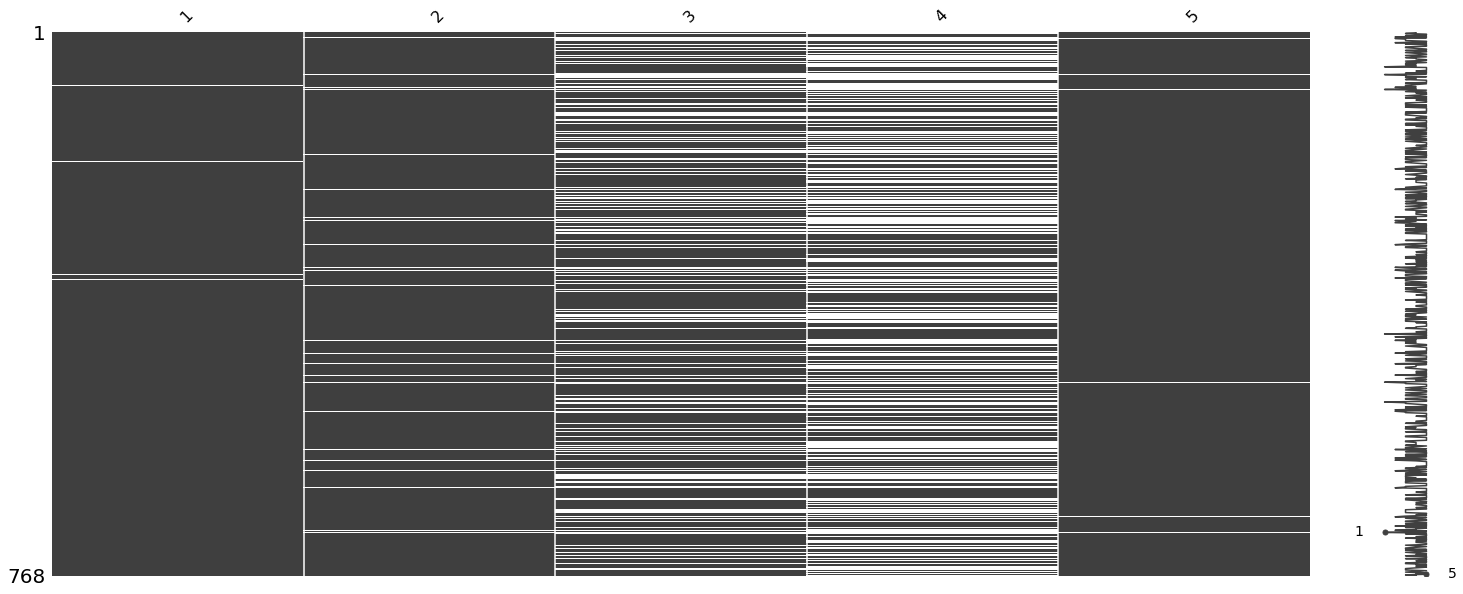

In [18]:
missingdata_df = d.columns[d.isnull().any()].tolist() # 使用刪選器 to_list
msno.matrix(d[missingdata_df])  #missing number mastrix 函數

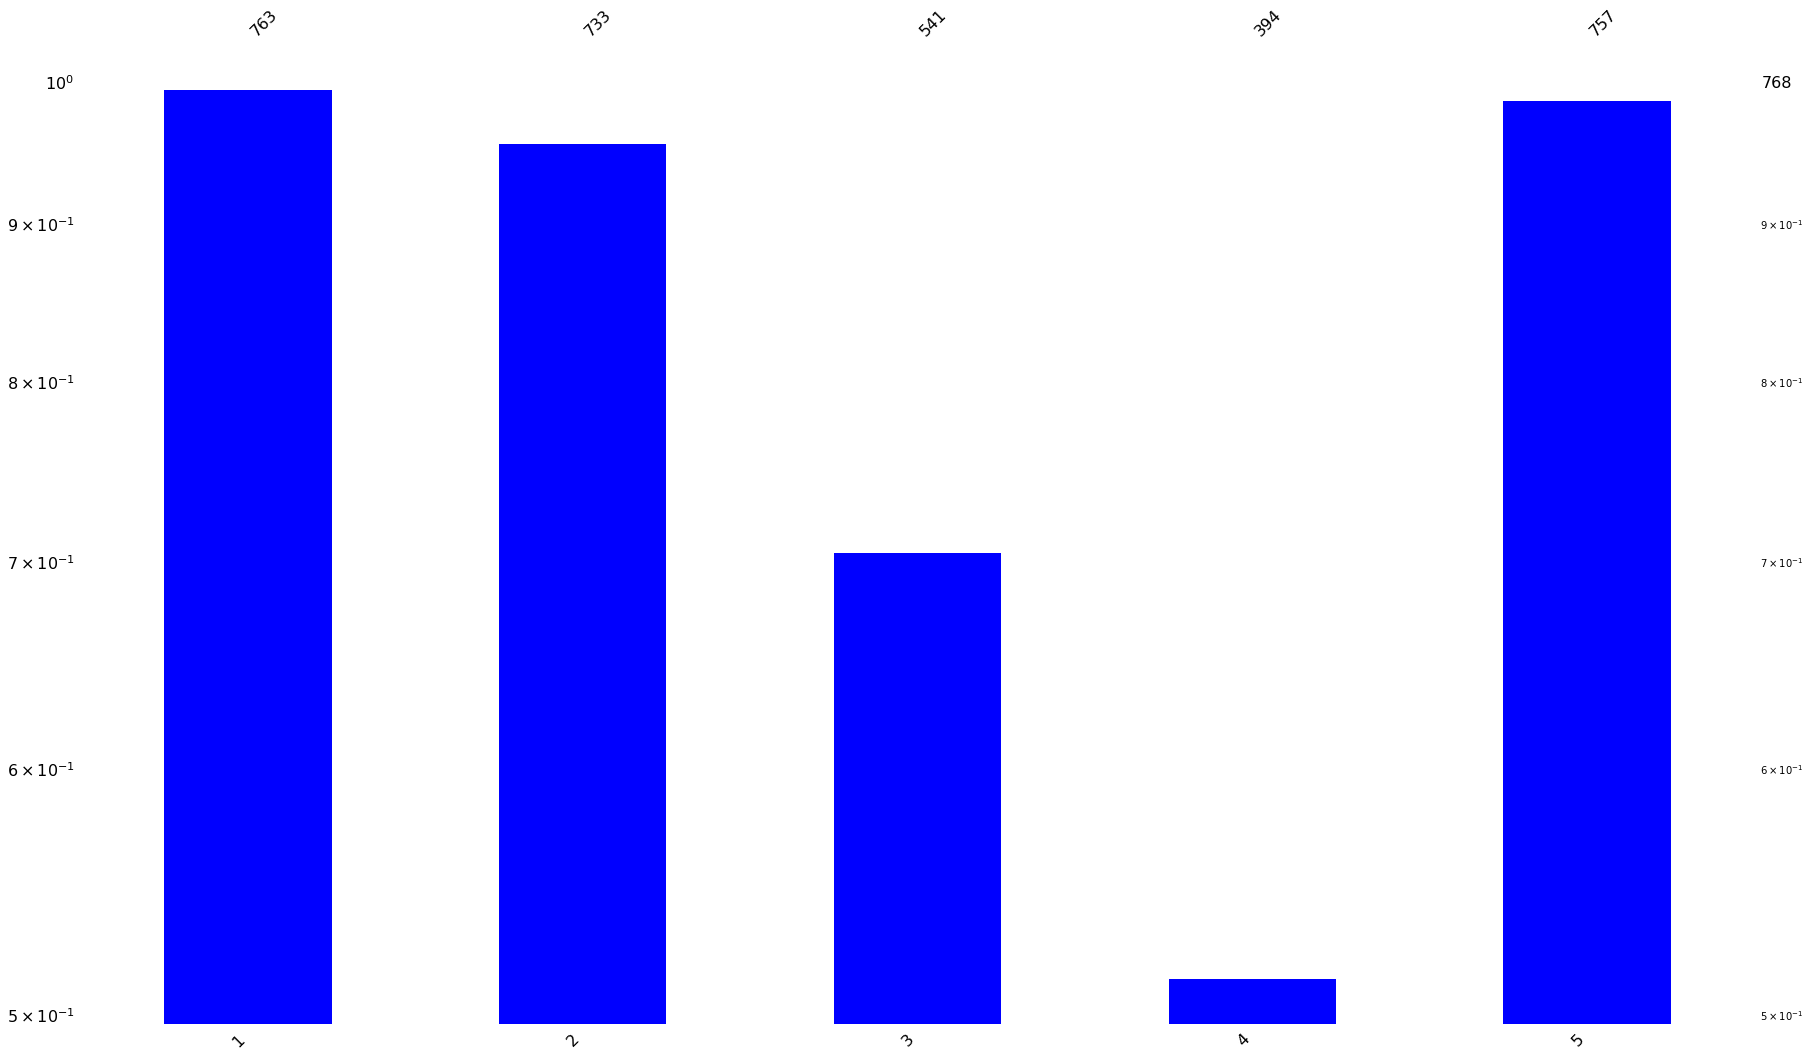

In [20]:
msno.bar(d[missingdata_df], color="blue" , log=True ,figsize=(30,18))

## Data Imputation

In [21]:
# fill missing values with mean column values
d.fillna(d.mean(), inplace=True)

In [22]:
print(d.isnull().sum())

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


### Use in-built imputation techniques

In [25]:
#from sklearn.preprocessing import Imputer  
#Change into
from sklearn.impute import SimpleImputer

In [38]:
values = d.values

d.isnull()

,0,1,2,3,4,5,6,7,8
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,True,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,True,False,False,False


In [27]:
values = d.values
imputer = SimpleImputer() ## call the function

#simple imputer strategy by default = 'mean'

In [30]:
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
np.isnan(transformed_values).sum()

np.isnan(transformed_values)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
### Customize imputer 

In [41]:
imp = SimpleImputer(missing_values= np.NaN , strategy='median')


# It was (numerical)np.NaN , not -> 'NaN' 
#strategy = median

In [42]:
transformed_values2 = imp.fit_transform(values)

In [43]:
print(np.isnan(transformed_values2).sum())

0
